In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import warnings

%matplotlib inline
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [20]:
# import csv file
df = pd.read_csv('2014_NEW_YORK_Offenses_Known_to_Law_Enforcement.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master' +
#                 '/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')


# clean up the dataframe
df = df.drop([0,1,2])
df = df.rename(columns=df.iloc[0])
df = df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'Murder',
                          'Aggravated\nassault':'Aggravated_Assault',
                          'Property\ncrime':'Property_Crime',
                          'Larceny-\ntheft':'Larceny_Theft',
                          'Motor\nvehicle\ntheft':'Motor_Theft',
                          'Arson3': 'Arson'})
df = df.drop([3])
df = df.reset_index(drop = True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)


# Change Population from object to int
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = pd.to_numeric(df['Population']).astype(float)

# Transfrom these variables to float for later use
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Robbery'] = pd.to_numeric(df['Robbery']).astype(float)


df['Aggravated_Assault'] = df['Aggravated_Assault'].str.replace(',', '')
df['Aggravated_Assault'] = pd.to_numeric(df['Aggravated_Assault']).astype(float)

df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Burglary'] = pd.to_numeric(df['Burglary']).astype(float)

df['Larceny_Theft'] = df['Larceny_Theft'].str.replace(',', '')
df['Larceny_Theft'] = pd.to_numeric(df['Larceny_Theft']).astype(float)

df['Motor_Theft'] = df['Motor_Theft'].str.replace(',', '')
df['Motor_Theft'] = pd.to_numeric(df['Motor_Theft']).astype(float)

df['Property_Crime'] = df['Property_Crime'].str.replace(',', '')
df['Property_Crime'] = pd.to_numeric(df['Property_Crime']).astype(float)

In [21]:
# Create a Feature dataframe
features = pd.DataFrame()

# set up features
features['Population'] = (df['Population']).dropna()
features['Population_Squared'] = features['Population']**2
features['Aggravated_Assault'] = (df['Aggravated_Assault']).dropna()
features['Burglary'] = (df['Burglary']).dropna()
features['Larceny_Theft'] = (df['Larceny_Theft']).dropna()
features['Motor_Theft'] = (df['Motor_Theft']).dropna()
features['Property_Crime'] = (df['Property_Crime']).dropna()

# target variable
features['Robbery'] = df['Robbery'].dropna()

    # Getting rid of outliers

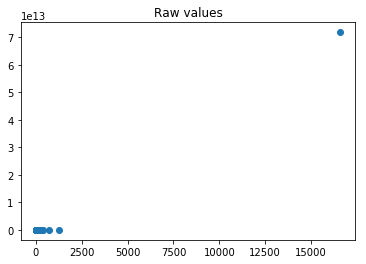

In [22]:
Y = features['Robbery'].values.reshape(-1, 1)
X = features[['Population_Squared', 'Aggravated_Assault', 'Burglary',
              'Larceny_Theft', 'Motor_Theft', 'Property_Crime']]

# Plot scatter graph to identify outliers
plt.scatter(Y, X['Population_Squared'])
plt.title('Raw values')
plt.show()

In [23]:
# Remove the outlier
loc = features.loc[lambda x: features['Robbery'] > 200]
print(loc)
features = features.drop(loc.index)

     Population  Population_Squared  Aggravated_Assault  Burglary  \
4       98595.0        9.720974e+09               503.0     683.0   
38     258419.0        6.678038e+10              1663.0    3119.0   
147     55722.0        3.104941e+09               221.0     201.0   
227   8473938.0        7.180763e+13             31460.0   15916.0   
283    210347.0        4.424586e+10               850.0    2125.0   
326    144534.0        2.089008e+10               668.0    1404.0   
366    200624.0        4.024999e+10               580.0     414.0   

     Larceny_Theft  Motor_Theft  Property_Crime  Robbery  
4           3083.0        122.0          3888.0    237.0  
38          8362.0        968.0         12449.0   1277.0  
147          607.0        157.0           965.0    248.0  
227       112107.0       7724.0        135747.0  16581.0  
283         6058.0        673.0          8856.0    698.0  
326         3986.0        365.0          5755.0    406.0  
366         1395.0        200.0   

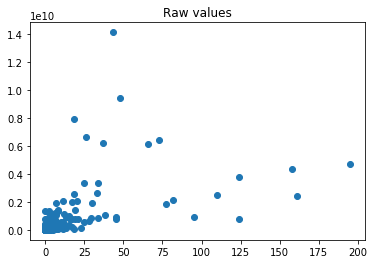

In [24]:
Y = features['Robbery'].values.reshape(-1, 1)
X = features[['Population_Squared', 'Aggravated_Assault', 'Burglary',
              'Larceny_Theft', 'Motor_Theft', 'Property_Crime']]

# Plot scatter graph to identify outliers
plt.scatter(Y, X['Population_Squared'])
plt.title('Raw values')
plt.show()

    # Normalize the Data

In [25]:
# Normalized Data
for var in list(features):
    features[var] = (features[var] - min(features[var])) / (max(features[var]) - min(features[var]))
    
# Remove Null Values from Features
features = features.dropna()

In [26]:
import statsmodels.formula.api as smf

# Write out the model formula.
linear_formula = 'Robbery ~ Population_Squared + Aggravated_Assault + Burglary + Larceny_Theft + Motor_Theft + Property_Crime'

# Fit the model to our data using the formula.
lm = smf.ols(formula = linear_formula, data = features).fit()

In [27]:
# list the parameters
lm.params

Intercept            -0.001543
Population_Squared    0.095584
Aggravated_Assault    0.960746
Burglary             -0.285864
Larceny_Theft         0.051298
Motor_Theft           0.229399
Property_Crime       -0.013369
dtype: float64

In [28]:
# list the p-values
lm.pvalues

Intercept             4.063007e-01
Population_Squared    1.386785e-03
Aggravated_Assault    3.561999e-76
Burglary              6.606683e-08
Larceny_Theft         1.356753e-02
Motor_Theft           2.393930e-09
Property_Crime        1.959113e-01
dtype: float64

In [29]:
# Calculate the R-Square
lm.rsquared

0.92757054991094967

    # OLS Regression

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
regr = linear_model.LinearRegression()

Y = features['Robbery']  # target
X = features[['Population_Squared', 'Aggravated_Assault', 'Burglary',
              'Larceny_Theft', 'Motor_Theft', 'Property_Crime']]
reg = regr.fit(X, Y)

score = cross_val_score(reg, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.89 (+/- 0.09)


    # KNN Regression

In [63]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
Y = features['Robbery']
X = features[['Population_Squared', 'Aggravated_Assault', 'Burglary',
              'Larceny_Theft', 'Motor_Theft', 'Property_Crime']]
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [65]:
# K = 5
score = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(score)

Weighted Accuracy: 0.78 (+/- 0.27)
[ 0.90461598  0.64098525  0.61500624  0.80005913  0.95282661]


In [58]:
# K = 10
score = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.75 (+/- 0.32)


In [60]:
# K = 15
score = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.72 (+/- 0.30)


    *KNN works better in a large dataset with more dense datapoints, less variance

    # Conclusion

    In terms of coding, these two model are pratically identical, the only difference is function I used to fit the models. In terms of algorithm, the OLS Regression follows an equation created to predict the outcomes. Whereas, the KNN Regression identify the nearest neighboring datapoints to predict the outcomes. 
    
    In this problem, the OLS Regression appears to be more accurate and less variate than the KNN Regression. However, this is to be expected since OLS Regression is created mainly for regression problems hence making it more robust in this kind of problem.